(1329, 2)


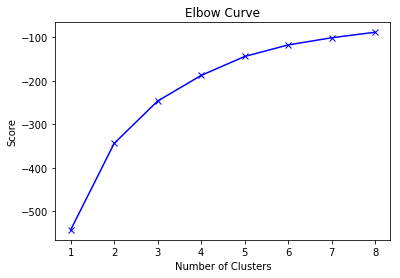

In [96]:
%matplotlib inline
# import packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# open processed data with encoding iso-8859-1
train_data = pd.read_csv("processed_data.csv", encoding='iso-8859-1')
test_data = pd.read_csv("processed_test_data.csv", encoding='iso-8859-1')

# data preprocessing
emotion_score = train_data['emotion_score'].dropna().values
classes = train_data['predictedclass'].dropna().values

# convert to numpy array 
X = np.array(list(zip(emotion_score, classes)))

# confirm the shape of the array
print(X.shape)

# Do Elbow Curve to find out the best number of cluster
cluster_number = range(1, 9)
kmeans = [KMeans(n_clusters=i) for i in cluster_number]
cluster_score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(cluster_number, cluster_score, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

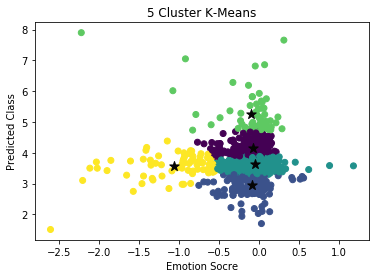

In [84]:
### from the above results we can find out the best number of classification is 5

# Initialize KMeans
kmeans = KMeans(n_clusters=5)
# Fit the data set
kmeansoutput = kmeans.fit(X)
# Get the center regarding each cluster
Centers = kmeans.cluster_centers_

# plot the results
plt.figure('5 Cluster K-Means')
# mark the cluster
plt.scatter(X[:, 0], X[:, 1], c = kmeansoutput.labels_)
# mark the center
plt.scatter(Centers[:,0], Centers[:,1], marker='*', c='#050505', s=100)
plt.xlabel('Emotion Socre')
plt.ylabel('Predicted Class')
plt.title('5 Cluster K-Means')
plt.show()